In [23]:
# Dependencies and data import

    # Dependencies
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from scipy import stats
    ## data import
# Get the file
# Load the CSV file created in Part 1 into a Pandas DataFrame
health_data_df = pd.read_csv("2019_Health_Data.csv")

# Display sample data
health_data_df.head()

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [24]:
# Rename columns for manageability and clarity in graphing
health_data_df.rename(
    columns={
        'How many employees does your company or organization have?': 'Number of Employees',
        'What US state or territory do you *live* in?': 'US State',
        'Have you ever been *diagnosed* with a mental health disorder?': 'Diagnosed?',
        '*Are you self-employed?*': 'Self-employed',
        '*If possibly, what disorder(s) do you believe you have?*': 'Possible Diagnosis',
        '*If so, what disorder(s) were you diagnosed with?*': 'Diagnosis',
        'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'Treament',
        'Do you have a family history of mental illness?': 'Family History',
        'Are you openly identified at work as a person with a mental health issue?': 'Identified with mental health issue at work',
        'What is your age?': 'Age',
        'what is your gender': 'Gender',
        'What country do you *live* in?': 'Country',
        'What US or territory do you *live* in?': 'State',
        'Overall, how much importance does your employer place on physical health?': 'Importance of Physical Health',
        'Overall, how much importance does your employer place on mental health?': 'Importance of Mental Health'
    },
    inplace=True
)


health_data_df.columns




Index(['Self-employed', 'Number of Employees',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to 

In [25]:
# Determine responses by US State

state_count = health_data_df['US State'].value_counts()
state_count

# Create dataframe from series for merging later.

state_count_df = state_count.to_frame()

# Rename column for better data description
state_count_df.rename(columns={'count': 'Total Responses'}, inplace=True)



In [26]:
# Identify those in each state reporting a mental health diagnosis

state_count_mh = health_data_df.loc[(health_data_df['Diagnosis'].notnull())]['US State'].value_counts()

# Create dataframe from series for merging later.
state_count_mh_df = state_count_mh.to_frame()

# Rename column for better data description
state_count_mh_df.rename(columns={'count': 'Total with Diagnosed Mental Health Issues'}, inplace=True)



In [27]:
# Merge dataframes

state = pd.merge(state_count_df, state_count_mh_df,on='US State',how='right')


In [28]:
# Create calculated column for percentages with mental health issues.

state["Percentage with Diagnosed Mental Health Issues"] = (
    state['Total with Diagnosed Mental Health Issues'] / state["Total Responses"] * 100
).map("{:.2f}%".format)

state = state.sort_values(by="Total Responses", ascending=False)


state

,Total Responses,Total with Diagnosed Mental Health Issues,Percentage with Diagnosed Mental Health Issues
US State,,,
California,20,7,35.00%
Nebraska,18,9,50.00%
New York,15,8,53.33%
Colorado,14,6,42.86%
Washington,13,9,69.23%
Tennessee,13,3,23.08%
Illinois,12,7,58.33%
Virginia,7,3,42.86%
North Carolina,7,2,28.57%


<function matplotlib.pyplot.show(close=None, block=None)>

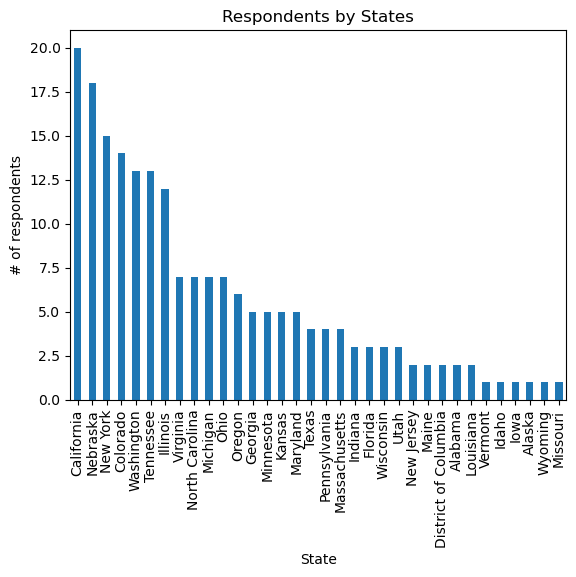

In [29]:
respondent_chart = state["Total Responses"].plot(kind= "bar", title="Respondents by States", xlabel="State", ylabel="# of respondents")
plt.show

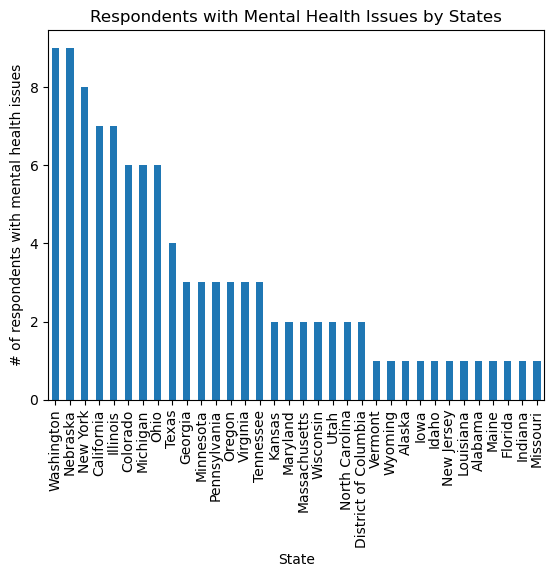

In [30]:
state = state.sort_values(by="Total with Diagnosed Mental Health Issues", ascending=False)

respondent_mh_chart = state["Total with Diagnosed Mental Health Issues"].plot(kind= "bar",
                                                                               title="Respondents with Mental Health Issues by States",
                                                                                 xlabel="State",
                                                                                   ylabel="# of respondents with mental health issues")



# Employer importance mental health versus physical health

In [31]:
# Mean importance of physical health
physical_health_importance = health_data_df.groupby('US State')['Importance of Physical Health'].mean()

# Convert Series to DataFrame
physical_health_importance_df = physical_health_importance.to_frame()

# Rename the column for clarity
physical_health_importance_df.rename(columns={'Importance of Physical Health': 'Physical Health Mean Response'}, inplace=True)

# Reset index for merging later
physical_health_importance_df.reset_index(inplace=True)




In [32]:
# Mean Importance of mental health

mental_health_importance = health_data_df.groupby('US State')['Importance of Mental Health'].mean()

# Convert Series to DataFrame
mental_health_importance_df = mental_health_importance.to_frame()

# Rename Column for Clarity
mental_health_importance_df.rename(columns={'Importance of Mental Health': 'Mental Health Mean Response'}, inplace=True)
mental_health_importance_df.reset_index(inplace=True)


In [33]:
# Merge dataframes

phys_mental_compare = pd.merge(physical_health_importance_df, mental_health_importance_df, on='US State', how='inner')


In [ ]:
# Add the 'Most Important' column, ChatGPT assist with coding for column
phys_mental_compare['Most Important'] = phys_mental_compare.apply(
    lambda row: 'Equal Importance' if row['Physical Health Mean Response'] == row['Mental Health Mean Response']
    else 'Physical Health' if row['Physical Health Mean Response'] > row['Mental Health Mean Response']
    else 'Mental Health', axis=1
)
phys_mental_compare

,US State,Physical Health Mean Response,Mental Health Mean Response,Most Important
0,Alabama,6.000000,7.000000,Mental Health
1,Alaska,3.000000,1.000000,Physical Health
2,Arizona,6.500000,4.000000,Physical Health
3,California,6.555556,5.555556,Physical Health
4,Colorado,6.000000,4.333333,Physical Health
5,Connecticut,7.000000,7.000000,Equal Importance
6,District of Columbia,7.500000,5.000000,Physical Health
7,Florida,7.666667,5.666667,Physical Health
8,Georgia,7.750000,4.250000,Physical Health
9,Idaho,5.000000,3.000000,Physical Health


In [41]:
# Analysis of which is typically most important.
priority  = phys_mental_compare['Most Important'].value_counts()

#Convert series to dataframe for graphing
priority_df = priority.to_frame()

priority_df


,count
Most Important,
Physical Health,34
Mental Health,2
Equal Importance,2


<function matplotlib.pyplot.show(close=None, block=None)>

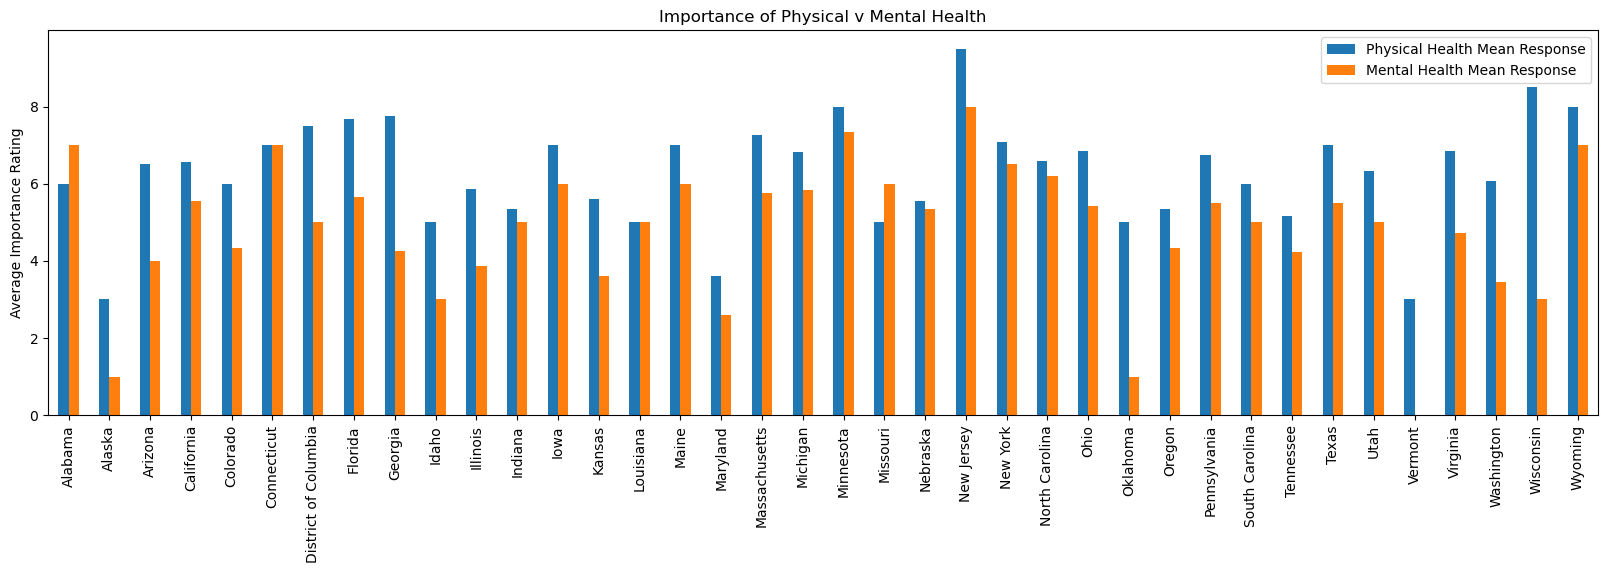

In [36]:
# Chart importance by State

priority_chart = phys_mental_compare.plot(kind='bar', figsize=(20,5), title='Importance of Physical v Mental Health', ylabel='Average Importance Rating')
priority_chart.set_xticklabels(phys_mental_compare['US State'])
plt.show

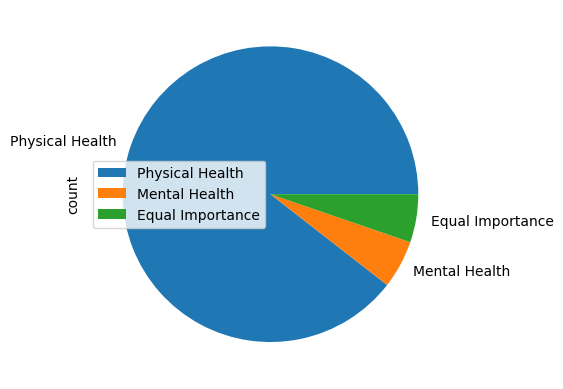

In [ ]:
# Importance Pie Chart

priority_pie= priority_df.plot(kind='pie', subplots=True)